In [1]:
# Add your imports here

import os
import operator
import networkx as nx
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
project_path = os.getcwd() + '/'

browser_data_path = 'data/'
pycharm_data_path = project_path + 'term_project/data/'

# selected_data_path = browser_data_path
selected_data_path = pycharm_data_path

edge_info_data_path = selected_data_path + 'edge_info.csv'
node_info_data_path = selected_data_path + 'node_info.csv'

In [3]:
def parse_node_info(file_path):
    parsed_nodes = []
    with open(file_path) as f:
        file_content = f.readlines()
    
    for node in file_content:
        cleansed_node = node.strip('\n').split(',')
        parsed_nodes.append({'name': cleansed_node[0] + ' ' + cleansed_node[1], 'status': cleansed_node[2] or 'N/A', 'email': cleansed_node[3]})
    
    return parsed_nodes

In [4]:
def parse_edge_info(file_path, start_date, end_date):
    parsed_edges = {}
    start_date_obj = datetime.strptime(start_date, '%Y-%m-%d %H:%M:%S')
    end_date_obj = datetime.strptime(end_date, '%Y-%m-%d %H:%M:%S')
    with open(file_path) as f:
        file_content = f.readlines()
    
    for edge in file_content:
        cleansed_edge = edge.strip('\n').split(',')
        _id = cleansed_edge[0] + ' ' + cleansed_edge[1]
        message_date = datetime.strptime(cleansed_edge[2], '%Y-%m-%d %H:%M:%S')
        
        if not (start_date_obj <= message_date <= end_date_obj):
            continue
        
        if _id in parsed_edges:
            prev_weight = parsed_edges[_id]['weight']
            parsed_edges[_id]['weight'] = prev_weight + 1
        else:
            parsed_edges[_id] = {'from': cleansed_edge[0], 'to': cleansed_edge[1], 'weight': 1}
    
    return parsed_edges

In [5]:
def line_break(number_of_breaks=3):
    for item in range(1, number_of_breaks):
        print "\n"

In [6]:
def sorted_print(unsorted_dict, number_of_times=10):
    sorted_values = sorted(unsorted_dict.items(), key=operator.itemgetter(1), reverse=True)
    
    counter = 0
    average_sum = 0
    for key, value in sorted_values:
        counter += 1
        average_sum += value
    
    for item in sorted_values[:number_of_times]:
        print item
    
    line_break()
    
    print "AVERAGE"
    print average_sum / float(counter)
    
    line_break()

In [7]:
def graph_statistics(start_date, end_date):
    Graph = nx.DiGraph()
    
    # graph_nodes = parse_node_info(node_info_data_path)
    graph_edges = parse_edge_info(edge_info_data_path, start_date, end_date)
    
    for key, value in graph_edges.items():
        Graph.add_edge(value['from'], value['to'], weight=value['weight'])
    
    node_positions = nx.spring_layout(Graph, k=1, iterations=10)
    nx.draw(Graph, node_positions, with_labels=False)
    
    print "NUMBER OF NODES"
    print Graph.number_of_nodes()
    line_break()
    
    print "NUMBER OF EDGES"
    print Graph.number_of_edges()
    line_break()
    
    print "DEGREE CENTRALITY"
    sorted_print(nx.degree_centrality(Graph))
    
    print "IN DEGREE CENTRALITY" 
    sorted_print(nx.in_degree_centrality(Graph))
    
    print "OUT DEGREE CENTRALITY"
    sorted_print(nx.out_degree_centrality(Graph))
    
    print "EIGENVECTOR CENTRALITY"
    sorted_print(nx.eigenvector_centrality(Graph))
    
    print "CLOSENESS CENTRALITY"
    sorted_print(nx.closeness_centrality(Graph))
    
    print "BETWEENNESS CENTRALITY"
    sorted_print(nx.betweenness_centrality(Graph))
    
    print "EDGE BETWEENNESS CENTRALITY"
    sorted_print(nx.edge_betweenness_centrality(Graph))
    
    print "PAGE RANK"
    sorted_print(nx.pagerank(Graph))
    
    print "TRANSITIVITY"
    print nx.transitivity(Graph)

NUMBER OF NODES
149




NUMBER OF EDGES
2463




DEGREE CENTRALITY
('louise.kitchen@enron.com', 0.668918918918919)
('sally.beck@enron.com', 0.6351351351351352)
('liz.taylor@enron.com', 0.6081081081081081)
('susan.scott@enron.com', 0.5810810810810811)
('mike.grigsby@enron.com', 0.5472972972972974)
('kenneth.lay@enron.com', 0.5135135135135136)
('lavorato@enron.com', 0.5135135135135136)
('phillip.k.ellen@enron.com', 0.49324324324324326)
('hunter.s.shively@enron.com', 0.46621621621621623)
('scott.neal@enron.com', 0.4594594594594595)




AVERAGE
0.22338109922




IN DEGREE CENTRALITY
('louise.kitchen@enron.com', 0.30405405405405406)
('mike.grigsby@enron.com', 0.27702702702702703)
('hunter.s.shively@enron.com', 0.2702702702702703)
('phillip.k.ellen@enron.com', 0.24324324324324326)
('scott.neal@enron.com', 0.2364864864864865)
('kevin.m.presto@enron.com', 0.22297297297297297)
('greg.whalley@enron.com', 0.21621621621621623)
('susan.scott@enron.com', 0.20945945945945948)
('fletcher.j.sturm@enron


('john.arnold@enron.com', 0.20270270270270271)




AVERAGE
0.11169054961




OUT DEGREE CENTRALITY
('liz.taylor@enron.com', 0.5135135135135136)
('lavorato@enron.com', 0.49324324324324326)
('sally.beck@enron.com', 0.49324324324324326)
('kenneth.lay@enron.com', 0.3783783783783784)
('susan.scott@enron.com', 0.37162162162162166)
('louise.kitchen@enron.com', 0.3648648648648649)
('kam.keiser@enron.com', 0.2972972972972973)
('mike.grigsby@enron.com', 0.2702702702702703)
('phillip.k.ellen@enron.com', 0.25)
('david.w.delainey@enron.com', 0.2364864864864865)




AVERAGE
0.11169054961




EIGENVECTOR CENTRALITY
('louise.kitchen@enron.com', 0.2371531602811707)
('hunter.s.shively@enron.com', 0.2029578364892814)
('mike.grigsby@enron.com', 0.19527287243301827)
('phillip.k.ellen@enron.com', 0.18349261617442822)
('scott.neal@enron.com', 0.17313718114541574)
('john.arnold@enron.com', 0.16942292366956269)
('fletcher.j.sturm@enron.com', 0.16361003933173052)
('greg.whalley@enron.com', 0.16221869710882938)


('david.w.delainey@enron.com', 0.47818466931094916)
('susan.scott@enron.com', 0.47818466931094916)




AVERAGE
0.408296583663




BETWEENNESS CENTRALITY
('susan.scott@enron.com', 0.0917569662206377)
('louise.kitchen@enron.com', 0.0628242787800587)
('mike.grigsby@enron.com', 0.044557364045246094)
('liz.taylor@enron.com', 0.04124163604969204)
('kim.ward@enron.com', 0.041154308471702386)
('kevin.m.presto@enron.com', 0.03892561528581742)
('kenneth.lay@enron.com', 0.03696610561375246)
('sally.beck@enron.com', 0.03637503966030481)
('m..forney@enron.com', 0.034759483964250874)
('mary.hain@enron.com', 0.0323703948134313)






AVERAGE
0.00918916451035




EDGE BETWEENNESS CENTRALITY
(('cara.semperger@enron.com', 'mary.hain@enron.com'), 0.014137291479495061)
(('bill.williams@enron.com', 'kay.mann@enron.com'), 0.011741171373576035)
(('kate.symes@enron.com', 'kim.ward@enron.com'), 0.01045729062736328)
(('kim.ward@enron.com', 'kate.symes@enron.com'), 0.008922440511673851)
(('kate.symes@enron.com', 'stacey.w.white@enron.com'), 0.008671571860724047)
(('robert.badeer@enron.com', 'jeff.dasovich@enron.com'), 0.008129440310536315)
(('kevin.m.presto@enron.com', 'bill.williams@enron.com'), 0.007696492623530231)
(('susan.scott@enron.com', 'm..forney@enron.com'), 0.00762325228502396)
(('mike.swerzbin@enron.com', 'mike.grigsby@enron.com'), 0.007551166213993217)
(('louise.kitchen@enron.com', 'lavorato@enron.com'), 0.007369231260397771)




AVERAGE
0.000940879487667




PAGE RANK
('mike.grigsby@enron.com', 0.019283943437855364)
('louise.kitchen@enron.com', 0.019072627693827934)
('kimberly.watson@enron.com', 0.0189631563607

('james.d.steffes@enron.com', 0.015525202957912473)
('susan.scott@enron.com', 0.014931477634738703)
('michelle.lokay@enron.com', 0.014222041960537583)
('mark.e.taylor@enron.com', 0.01355979510722586)
('tana.jones@enron.com', 0.013512150375204965)




AVERAGE
0.00671140939597




TRANSITIVITY
0.291828486628


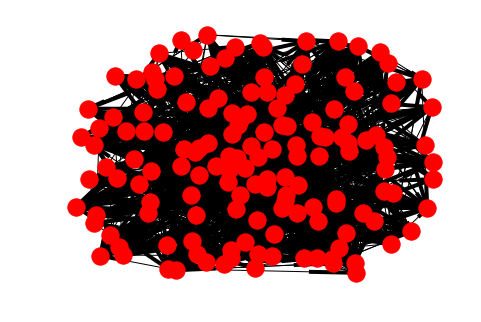

In [8]:
graph_statistics('1998-11-13 04:07:00', '2002-06-21 15:40:19')

NUMBER OF NODES
55




NUMBER OF EDGES
121




DEGREE CENTRALITY
('mark.e.taylor@enron.com', 0.42592592592592593)
('tana.jones@enron.com', 0.35185185185185186)
('sara.shackleton@enron.com', 0.31481481481481477)
('sally.beck@enron.com', 0.2962962962962963)
('elizabeth.sager@enron.com', 0.25925925925925924)
('richard.b.sanders@enron.com', 0.2037037037037037)
('e..haedicke@enron.com', 0.2037037037037037)
('carol.clair@enron.com', 0.16666666666666666)
('gerald.nemec@enron.com', 0.14814814814814814)
('louise.kitchen@enron.com', 0.14814814814814814)




AVERAGE
0.0814814814815




IN DEGREE CENTRALITY
('mark.e.taylor@enron.com', 0.14814814814814814)
('elizabeth.sager@enron.com', 0.12962962962962962)
('richard.b.sanders@enron.com', 0.1111111111111111)
('sara.shackleton@enron.com', 0.1111111111111111)
('e..haedicke@enron.com', 0.09259259259259259)
('tana.jones@enron.com', 0.09259259259259259)
('steven.j.kean@enron.com', 0.09259259259259259)
('susan.scott@enron.com', 0.07407407407407407)
('dan.

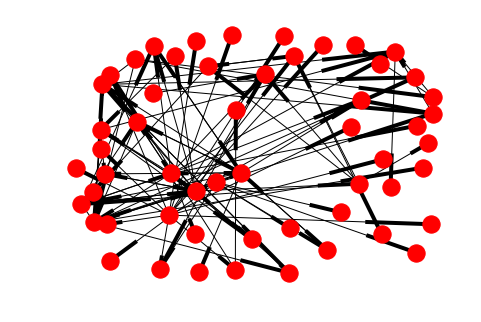

In [9]:
graph_statistics('1998-11-13 04:07:00', '1999-12-31 05:18:00')

NUMBER OF NODES
136




NUMBER OF EDGES
888




DEGREE CENTRALITY
('david.w.delainey@enron.com', 0.35555555555555557)
('louise.kitchen@enron.com', 0.31851851851851853)
('richard.b.sanders@enron.com', 0.3037037037037037)
('phillip.k.ellen@enron.com', 0.2962962962962963)
('tana.jones@enron.com', 0.2888888888888889)
('mark.e.taylor@enron.com', 0.2814814814814815)
('e..haedicke@enron.com', 0.2740740740740741)
('j.kaminski@enron.com', 0.26666666666666666)
('scott.neal@enron.com', 0.25925925925925924)
('steven.j.kean@enron.com', 0.25925925925925924)




AVERAGE
0.0967320261438




IN DEGREE CENTRALITY
('david.w.delainey@enron.com', 0.14814814814814814)
('e..haedicke@enron.com', 0.14814814814814814)
('richard.b.sanders@enron.com', 0.14074074074074075)
('mark.e.taylor@enron.com', 0.14074074074074075)
('louise.kitchen@enron.com', 0.12592592592592594)
('tana.jones@enron.com', 0.12592592592592594)
('steven.j.kean@enron.com', 0.11851851851851852)
('hunter.s.shively@enron.com', 0.11111111111111112)

('richard.b.sanders@enron.com', 0.3229186451408674)
('david.w.delainey@enron.com', 0.3215445232466509)
('mark.e.taylor@enron.com', 0.3201820464532329)
('jeffrey.a.shankman@enron.com', 0.31616302494963583)
('phillip.k.ellen@enron.com', 0.31616302494963583)
('hunter.s.shively@enron.com', 0.3135392654064853)
('steven.j.kean@enron.com', 0.30716651610960555)
('john.arnold@enron.com', 0.304689366786141)
('e..haedicke@enron.com', 0.304689366786141)
('tana.jones@enron.com', 0.3022518518518519)




AVERAGE
0.241820466535




BETWEENNESS CENTRALITY
('phillip.k.ellen@enron.com', 0.09905250409906449)
('susan.scott@enron.com', 0.0757336432822814)
('mary.hain@enron.com', 0.06965928954363024)
('richard.b.sanders@enron.com', 0.06807345061797357)
('david.w.delainey@enron.com', 0.06699371165644166)
('hunter.s.shively@enron.com', 0.05934896833758787)
('tana.jones@enron.com', 0.05180180804851365)
('kim.ward@enron.com', 0.05176574153027559)
('kate.symes@enron.com', 0.04673976597691357)


('scott.neal@enron.com', 0.044660033719907004)




AVERAGE
0.0115862680064




EDGE BETWEENNESS CENTRALITY
(('kate.symes@enron.com', 'kim.ward@enron.com'), 0.032407407407407406)
(('mary.hain@enron.com', 'm..forney@enron.com'), 0.030496604468182937)
(('kim.ward@enron.com', 'phillip.k.ellen@enron.com'), 0.02903940597751067)
(('doug.gilbert-smith@enron.com', 'juan.hernandez@enron.com'), 0.027995642701525054)
(('phillip.k.ellen@enron.com', 'mary.hain@enron.com'), 0.021824513095941925)
(('m..forney@enron.com', 'kate.symes@enron.com'), 0.02014379218726608)
(('richard.b.sanders@enron.com', 'mary.hain@enron.com'), 0.01816388913757589)
(('joe.quenet@enron.com', 'chris.dorland@enron.com'), 0.018037400145243285)
(('kim.ward@enron.com', 'kate.symes@enron.com'), 0.01779315588040095)
(('fletcher.j.sturm@enron.com', 'joe.quenet@enron.com'), 0.01640341321713871)




AVERAGE
0.00256923590257




PAGE RANK
('tana.jones@enron.com', 0.040504390975016215)
('mark.e.taylor@enron.com', 0.039171475102226544)


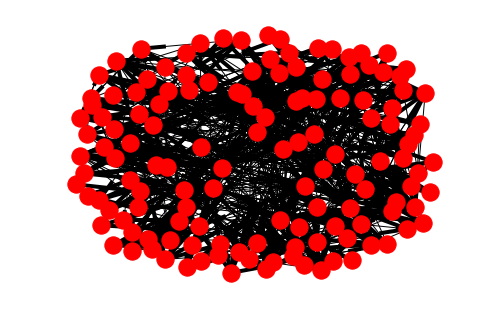

In [10]:
graph_statistics('2000-01-04 00:51:00', '2000-12-30 05:05:00')

NUMBER OF NODES
149




NUMBER OF EDGES
2197




DEGREE CENTRALITY
('louise.kitchen@enron.com', 0.6283783783783784)
('sally.beck@enron.com', 0.5878378378378378)
('liz.taylor@enron.com', 0.5743243243243243)
('susan.scott@enron.com', 0.5405405405405406)
('mike.grigsby@enron.com', 0.5202702702702703)
('kenneth.lay@enron.com', 0.5067567567567568)
('lavorato@enron.com', 0.5067567567567568)
('kam.keiser@enron.com', 0.43243243243243246)
('phillip.k.ellen@enron.com', 0.41891891891891897)
('kevin.m.presto@enron.com', 0.41216216216216217)




AVERAGE
0.199256303283




IN DEGREE CENTRALITY
('louise.kitchen@enron.com', 0.28378378378378377)
('mike.grigsby@enron.com', 0.2702702702702703)
('hunter.s.shively@enron.com', 0.2364864864864865)
('phillip.k.ellen@enron.com', 0.22297297297297297)
('greg.whalley@enron.com', 0.20945945945945948)
('scott.neal@enron.com', 0.20270270270270271)
('kevin.m.presto@enron.com', 0.20270270270270271)
('john.arnold@enron.com', 0.18243243243243246)
('kim.ward@enron.com', 

('louise.kitchen@enron.com', 0.24340424868970417)
('mike.grigsby@enron.com', 0.21978218133011007)
('hunter.s.shively@enron.com', 0.20439554417857758)
('phillip.k.ellen@enron.com', 0.19278215471789173)
('john.arnold@enron.com', 0.16925721035139843)
('scott.neal@enron.com', 0.16913400452517452)
('greg.whalley@enron.com', 0.16707604605518214)
('kevin.m.presto@enron.com', 0.1536605812924663)
('barry.tycholiz@enron.com', 0.1426048858880712)
('thomas.a.martin@enron.com', 0.14092643521137516)




AVERAGE
0.0683905253538




CLOSENESS CENTRALITY


('louise.kitchen@enron.com', 0.5132165132165133)
('mike.grigsby@enron.com', 0.5094840294840296)
('kevin.m.presto@enron.com', 0.48313140726933834)
('phillip.k.ellen@enron.com', 0.48313140726933834)
('hunter.s.shively@enron.com', 0.47655819084390516)
('fletcher.j.sturm@enron.com', 0.47174447174447176)
('scott.neal@enron.com', 0.4701614366043897)
('greg.whalley@enron.com', 0.46393413280830503)
('barry.tycholiz@enron.com', 0.46240299705646243)
('susan.scott@enron.com', 0.4578696343402226)




AVERAGE
0.390585115354




BETWEENNESS CENTRALITY


('susan.scott@enron.com', 0.0935530037876047)
('louise.kitchen@enron.com', 0.07928422872196589)
('mike.grigsby@enron.com', 0.058274977782716744)
('liz.taylor@enron.com', 0.05280217629102691)
('kenneth.lay@enron.com', 0.04925850081902026)
('kevin.m.presto@enron.com', 0.047844639342541476)
('bill.williams@enron.com', 0.042089458295664975)
('sally.beck@enron.com', 0.04072453604666316)
('hunter.s.shively@enron.com', 0.032212769917675875)
('mary.hain@enron.com', 0.03133909354660975)




AVERAGE
0.00991595622468




EDGE BETWEENNESS CENTRALITY


(('kate.symes@enron.com', 'stacey.w.white@enron.com'), 0.01907527632134639)
(('cara.semperger@enron.com', 'mary.hain@enron.com'), 0.016175157995000383)
(('bill.williams@enron.com', 'kay.mann@enron.com'), 0.014124064948551642)
(('robert.badeer@enron.com', 'mike.grigsby@enron.com'), 0.013207532940670253)
(('kevin.m.presto@enron.com', 'bill.williams@enron.com'), 0.010157417648277762)
(('mike.swerzbin@enron.com', 'mike.grigsby@enron.com'), 0.009877053737601444)
(('hunter.s.shively@enron.com', 'liz.taylor@enron.com'), 0.00944773452442152)
(('louise.kitchen@enron.com', 'lavorato@enron.com'), 0.009374039531935711)
(('benjamin.rogers@enron.com', 'kenneth.lay@enron.com'), 0.009224066292400772)
(('mike.swerzbin@enron.com', 'kevin.m.presto@enron.com'), 0.008138698651188351)




AVERAGE
0.00110342492496




PAGE RANK
('mike.grigsby@enron.com', 0.025107694754868976)
('louise.kitchen@enron.com', 0.01938230483665432)
('kimberly.watson@enron.com', 0.019046596880287467)
('barry.tycholiz@enron.com', 0.0


('steven.harris@enron.com', 0.01521156638677047)
('susan.scott@enron.com', 0.014360824506612949)
('jason.williams@enron.com', 0.01425271342294257)
('john.arnold@enron.com', 0.013855259064533026)




AVERAGE
0.00671140939597




TRANSITIVITY
0.272616833074


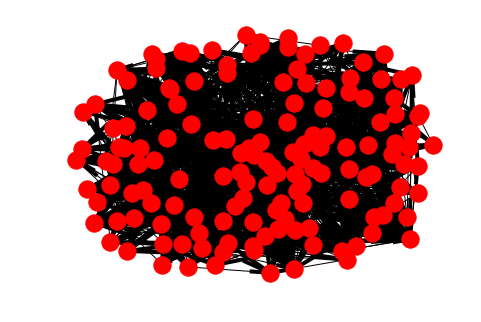

In [11]:
graph_statistics('2001-01-01 08:55:00', '2002-06-21 15:40:19')